## Final Project Submission

Please fill out:
* Student name: Joackim Kisienya
* Student pace: part time 
* Scheduled project review date/time: 29/04/2025
* Instructor name: Maryann Mwikali
* Blog post URL:


# Business understanding-goals
## Introduction
The company I am working with is interested in purchasing and operating airplanes for commercial and private enterprises.I seek  to determine which aircraft are the lowest risk for the company to start this new business endevor. This will assist the head of the new aviation division make a decision on which aircraft to purchase.

# Data understanding
The data [Aviation_Data.csv](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) is sourced from kaggle and it is from the National Transport safety Board.It contains information from 1962 to 2023 about civil aviation accidents and selected incidents within the United States, its territories and possessions, and international waters.

### Setup
* Import pandas and Matplotlib librarries for analysis and plotting respectively.

In [1]:
import pandas as pd #import pandas library to manipulate our dataset
import matplotlib.pyplot as plt #import matplotlib library for visualizations

## Data inspection
Load **Aviation_Data.csv** file as **Aviation** DataFrame

In [2]:
Aviation = pd.read_csv('data\Aviation_Data.csv', low_memory = False) #Reading Aviation_Data.csv into a DataFrame 
Aviation.head() #Display the first five records

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#Display information about our dataset.
Aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [4]:
#print number of rows and columns
num_rows, num_cols = Aviation.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 90348
Number of columns: 31


In [5]:
#checking for missing values in our dataset
Aviation.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [6]:
#checking for percentage of missing values in our dataset
((Aviation.isnull()|Aviation.isna()).sum() *100 / Aviation.index.size).round(2)

Event.Id                   1.61
Investigation.Type         0.00
Accident.Number            1.61
Event.Date                 1.61
Location                   1.67
Country                    1.87
Latitude                  61.94
Longitude                 61.95
Airport.Code              44.51
Airport.Name              41.67
Injury.Severity            2.72
Aircraft.damage            5.15
Aircraft.Category         64.26
Registration.Number        3.14
Make                       1.68
Model                      1.72
Amateur.Built              1.73
Number.of.Engines          8.35
Engine.Type                9.47
FAR.Description           64.56
Schedule                  86.07
Purpose.of.flight          8.47
Air.carrier               81.57
Total.Fatal.Injuries      14.23
Total.Serious.Injuries    15.46
Total.Minor.Injuries      14.82
Total.Uninjured            8.16
Weather.Condition          6.59
Broad.phase.of.flight     31.68
Report.Status              8.68
Publication.Date          18.47
dtype: f

### Data preparation
* Drop some columns with over 40% missing values.

In [7]:
# Drop selected columns with more than 40% missing values
Drop_cols = ['Latitude', 'Longitude','Airport.Code','Airport.Name','FAR.Description', 'Schedule', 'Air.carrier']
Aviation = Aviation.drop(columns=Drop_cols)
Aviation.isnull().sum()
Aviation.shape

(90348, 24)

In [8]:
# Drop rows with missing values in key columns.
Aviation.dropna(subset=['Make', 'Model', 'Location', 'Total.Fatal.Injuries', 'Aircraft.Category','Weather.Condition',
                            'Purpose.of.flight','Aircraft.damage'], inplace=True)

# Strip whitespaces
Aviation = Aviation.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convert Total.Fatal.Injuries to numeric
Aviation["Total.Fatal.Injuries"] = pd.to_numeric(Aviation["Total.Fatal.Injuries"], errors="coerce")

# Filter out rows with invalid or negative injury values
Aviation = Aviation[Aviation["Total.Fatal.Injuries"] >= 0]
Aviation.shape

(23194, 24)

### Categorize data
* Filter data to required private and commercial airplanes
* Filter data by Airplane category

In [9]:
# Define the custom order for sorting
custom_order = ["Personal", "Business", "Ferry", "Executive/Corporate"]

# Sort the dataframe based on the custom order
Aviation_sorted = Aviation[Aviation['Purpose.of.flight'].isin(custom_order)].copy()
Aviation_sorted['Purpose.of.flight'] = pd.Categorical(Aviation_sorted['Purpose.of.flight'], categories=custom_order, ordered=True)
Aviation_sorted = Aviation_sorted.sort_values('Purpose.of.flight')

Aviation_sorted.shape

(15996, 24)

In [10]:
#Filter data by Airplane category
Airplanes = Aviation_sorted[Aviation_sorted['Aircraft.Category'] == 'Airplane']
Airplanes.to_csv('airplanes_data.csv', index=False)

### Analyze Risk by Airplane Make and Model
* Fatality rate by Make
* Fatality rate by Model
* Popular low risk airplanes

In [11]:
X = 50

# Filter makes with at least X accidents
makes_with_min_accidents = Airplanes.groupby('Make').filter(lambda x: len(x) >= X)

# Calculate fatality rate for each make
fatality_rates_by_make = makes_with_min_accidents.groupby('Make').agg(
    total_accidents=('Event.Id', 'count'),
    total_fatalities=('Total.Fatal.Injuries', 'sum')
)
fatality_rates_by_make['fatality_rate'] = fatality_rates_by_make['total_fatalities'] / fatality_rates_by_make['total_accidents']

# Sort by fatality rate in ascending order
lowest_fatality_rates_by_make = fatality_rates_by_make.sort_values('fatality_rate', ascending=True)

In [12]:
X = 50

# Filter models with at least X accidents
models_with_min_accidents = Airplanes.groupby('Model').filter(lambda x: len(x) >= X)

# Calculate fatality rate for each model
fatality_rates = models_with_min_accidents.groupby('Model').agg(
    total_accidents=('Event.Id', 'count'),
    total_fatalities=('Total.Fatal.Injuries', 'sum')
)
fatality_rates['fatality_rate'] = fatality_rates['total_fatalities'] / fatality_rates['total_accidents']

# Sort by fatality rate in ascending order
lowest_fatality_rates = fatality_rates.sort_values('fatality_rate', ascending=True)

In [13]:
# Group by Make and Model
risk_analysis = Airplanes.groupby(["Make", "Model"]).agg(
    Total_Accidents=("Event.Id", "count"),
    Total_Fatalities=("Total.Fatal.Injuries", "sum"),
    Avg_Fatalities_Per_Accident=("Total.Fatal.Injuries", "mean")
).reset_index()

# Sort by Total_Fatalities to identify low-risk aircraft
low_risk_aircraft = risk_analysis.sort_values(by="Total_Fatalities", ascending=True)

In [14]:
# Group by Make and Model for popular aircraft
popular_grouped = Airplanes.groupby(["Make", "Model"]).agg(
    Total_Accidents=("Event.Id", "count"),
    Total_Fatalities=("Total.Fatal.Injuries", "sum"),
    Avg_Fatalities_Per_Accident=("Total.Fatal.Injuries", "mean")
).reset_index()

# Define a threshold for popularity (e.g., aircraft with more than 50 accidents)
popular_airplanes = popular_grouped[popular_grouped["Total_Accidents"] > 50]

# Sort by Total_Accidents in descending order
popular_airplanes = popular_grouped.sort_values(by="Total_Accidents", ascending=False)
popular_airplanes.head(10)

,Make,Model,Total_Accidents,Total_Fatalities,Avg_Fatalities_Per_Accident
938,CESSNA,172,228,56.0,0.245614
1394,Cessna,172,175,34.0,0.194286
1235,CIRRUS DESIGN CORP,SR22,115,72.0,0.626087
971,CESSNA,180,114,11.0,0.096491
983,CESSNA,182,110,30.0,0.272727
425,BEECH,A36,108,79.0,0.731481
3685,PIPER,PA-18-150,107,5.0,0.046729
1432,Cessna,182,98,37.0,0.377551
3786,PIPER,PA28,97,40.0,0.412371
955,CESSNA,172N,92,32.0,0.347826


In [18]:
# Weather Analysis
weather_risk = Aviation.groupby('Weather.Condition').agg(Total_Accidents=('Event.Date', 'count'),Fatal_Accidents=('Total.Fatal.Injuries', lambda x: (x > 0).sum())).reset_index()
weather_risk['Fatality_Rate'] = weather_risk['Fatal_Accidents'] / weather_risk['Total_Accidents']
weather_risk

,Weather.Condition,Total_Accidents,Fatal_Accidents,Fatality_Rate
0,IMC,1209,791,0.654260
1,UNK,79,46,0.582278
2,Unk,124,89,0.717742
3,VMC,21782,3625,0.166422


### Visualizations
* Fatalities by Make
* Fatalities by Model
* Low risk airplanes

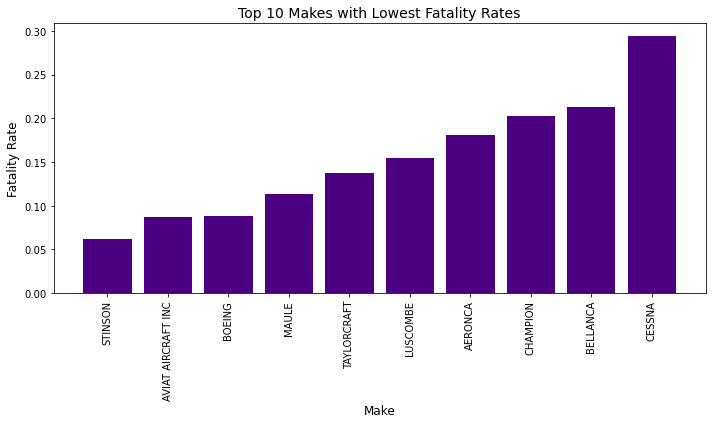

In [15]:
top_10_lowest_fatality_rates = lowest_fatality_rates_by_make.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_10_lowest_fatality_rates.index, top_10_lowest_fatality_rates['fatality_rate'], color='indigo')
plt.xlabel('Make', fontsize=12)
plt.ylabel('Fatality Rate', fontsize=12)
plt.title('Top 10 Makes with Lowest Fatality Rates', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

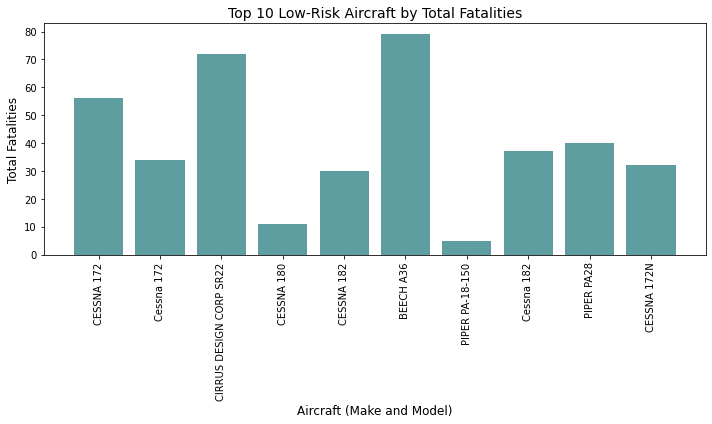

In [16]:
# Select the top 10 low-risk popular aircraft 
top_10_low_risk_popular_aircraft = popular_airplanes.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_10_low_risk_popular_aircraft['Make'] + " " + top_10_low_risk_popular_aircraft['Model'], 
    top_10_low_risk_popular_aircraft['Total_Fatalities'], color='cadetblue')
plt.xlabel('Aircraft (Make and Model)', fontsize=12)
plt.ylabel('Total Fatalities', fontsize=12)
plt.title('Top 10 Low-Risk Aircraft by Total Fatalities', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

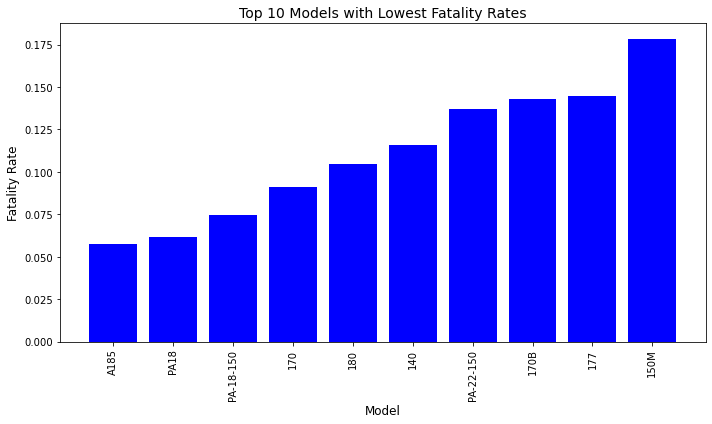

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(lowest_fatality_rates.index[:10], lowest_fatality_rates['fatality_rate'][:10], color='blue')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Fatality Rate', fontsize=12)
plt.title('Top 10 Models with Lowest Fatality Rates', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## RECOMMENDATION
From my analysis of Aviation_Data.csv, here are my findings:
1. Purchase CESSNA 172 model which has the lowest risk. Cessna has the lowest fatality rate.
2. CESSNA make has low accident rates and should be considered as the best manufacturer among the ones analysed.
3. VMC weather condition has the highest number of fatalities. Those operating the airplane should take note of this.

In [19]:
Aviation.to_csv('Aviation_Cleaned.csv') # this created a a csv file that can be further explored on Tableau.